In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
def GridSearchCV:
    pass

In [5]:
X, y = make_classification(n_samples = 1000, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=3, random_state=46)

def euclidian_dist(a,b):
    return np.sum((a-b)**2, axis=1)

def KNN(k):

  train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

  predicted_y = np.array([np.argmax(np.bincount(train_y[np.argsort(euclidian_dist(x, train_x))[0:k]])) for x in test_x])
  
  prediction_error = float(sum(predicted_y != test_y))/ float(len(test_y))
  
  return (prediction_error, test_y, predicted_y)

def confusion_matrix(test_y, predicted_y, class_num):
  
  return np.bincount(test_y * class_num + predicted_y).reshape((class_num, class_num))



k = [1, 3, 10 ,40]

error_dict = {}



for i in range(len(k)):
  error, test_y, predicted_y = KNN(k[i])
  error_dict[k[i]] = error
  print('Accuracy for k = {} is {}'.format(k[i], 1-error))
  
  conf_matrix = confusion_matrix(test_y, predicted_y, 3)
  print('Confusion matrix for k = {} :'.format(k[i]))
  print(conf_matrix)
  
print('Best k value with the lowest prediction error: {}'.format(min(error_dict, key=lambda k: error_dict[k])))

Accuracy for k = 1 is 0.9299999999999999
Confusion matrix for k = 1 :
[[64  2  4]
 [ 2 64  2]
 [ 4  0 58]]
Accuracy for k = 3 is 0.94
Confusion matrix for k = 3 :
[[65  2  3]
 [ 1 66  2]
 [ 4  0 57]]
Accuracy for k = 10 is 0.96
Confusion matrix for k = 10 :
[[61  2  3]
 [ 0 61  1]
 [ 1  1 70]]
Accuracy for k = 40 is 0.97
Confusion matrix for k = 40 :
[[64  2  4]
 [ 0 59  0]
 [ 0  0 71]]
Best k value with the lowest prediction error: 40


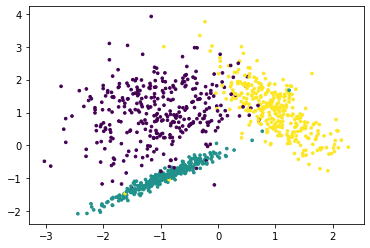

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=7);